In [1]:
import grid2op
import json
import os
import numpy as np
import matplotlib.pyplot as plt

from Agents.HigLevel import IMARL
from grid2op.utils import EpisodeStatistics
from grid2op.Reward import L2RPNSandBoxScore, CloseToOverflowReward
from grid2op.Agent import DoNothingAgent
from lightsim2grid import LightSimBackend

In [2]:
SEED = 24

In [3]:
env_name = 'l2rpn_case14_sandbox'

In [4]:
env_train = grid2op.make(env_name+"_train", reward_class=CloseToOverflowReward)
env_train.seed(SEED)
nb_scenario = 112 * len(env_train.chronics_handler.subpaths)
n_epochs = len(env_train.chronics_handler.subpaths)

In [5]:
def safe(obs):
    for c in obs.rho:
        if c >= 0.9:
            return False
    return True

In [64]:
env_train = grid2op.make(env_name+"_train", reward_class=CloseToOverflowReward, backend=LightSimBackend())
n_epochs = len(env_train.chronics_handler.subpaths)
dn = DoNothingAgent(env_train.action_space) 
survived = 1
safes = 0
ep_reward = 0
reward = 0
firstunsafe = False
ep_safes = []
ep_survived = []
rewards = []

for i in range(n_epochs):
    done = False
    obs = env_train.reset()
    survived = 1
    safes = 0
    ep_reward = 0
    while not done:
        if safe(obs) and not firstunsafe:
            safes += 1
        else: 
            first_unsafe = True 
        action = dn.act(obs, reward)
        obs, reward, done, _  = env_train.step(action)

        if not done:
            survived += 1
        else:
            ep_safes.append(safes)
            ep_survived.append(survived)
            rewards.append(ep_reward)
        ep_reward += reward


In [12]:
dn_path =  'Interesting_data/donothing_24'

In [13]:
a_steps_path = os.path.join(dn_path, 'survived_timesteps.npy')
a_safe_path = os.path.join(dn_path, 'safes.npy')
a_rew_path = os.path.join(dn_path, 'rewards.npy')

with open(a_steps_path, 'wb') as f:
    np.save(f, ep_survived)

with open(a_safe_path, 'wb') as f:
    np.save(f, ep_safes)

with open(a_rew_path, 'wb') as f:
    np.save(f, rewards)

NameError: name 'ep_survived' is not defined

In [14]:
a_steps_path = os.path.join(dn_path, 'survived_timesteps.npy')
a_safe_path = os.path.join(dn_path, 'safes.npy')
a_rew_path = os.path.join(dn_path, 'rewards.npy')


with open(a_steps_path, 'rb') as f:
    dn_surv = np.load(f)

with open(a_safe_path, 'rb') as f:
    dn_safes = np.load(f)

with open(a_rew_path, 'rb') as f:
    dn_rew = np.load(f)


ValueError: Cannot load file containing pickled data when allow_pickle=False

In [72]:
path_partial = 'Interesting_data/independent_obs_24\\final'

In [73]:
a_steps_path = os.path.join(path_partial, 'survived_timesteps.npy')
a_safe_path = os.path.join(path_partial, 'safes.npy')
a_rew_path = os.path.join(path_partial, 'rewards.npy')
a_ag_reward_path = os.path.join(path_partial, 'agent_rewards.npy')

with open(a_steps_path, 'rb') as f:
    a_steps = np.load(f)

with open(a_safe_path, 'rb') as f:
    a_safe = np.load(f)

#with open(a_of_path, 'rb') as f:
#    a_of = np.load(f)

with open(a_rew_path, 'rb') as f:
    a_rew = np.load(f)

with open(a_ag_reward_path, 'rb') as f:
    a_ag_reward = np.load(f)

In [43]:
path_full_obs= 'Interesting_data\\complete_obs_24\\final'

In [44]:
a_steps_path = os.path.join(path_full_obs, 'survived_timesteps.npy')
a_safe_path = os.path.join(path_full_obs, 'safes.npy')
a_rew_path = os.path.join(path_full_obs, 'rewards.npy')
a_ag_reward_path = os.path.join(path_full_obs, 'agent_rewards.npy')

with open(a_steps_path, 'rb') as f:
    a_steps1 = np.load(f)

with open(a_safe_path, 'rb') as f:
    a_safe1 = np.load(f)

#with open(a_of_path, 'rb') as f:
#    a_of = np.load(f)

with open(a_rew_path, 'rb') as f:
    a_rew1 = np.load(f)

with open(a_ag_reward_path, 'rb') as f:
    a_ag_reward1 = np.load(f)

In [45]:
centr_path = 'Interesting_data\\centralized_24\\final'

In [46]:
a_steps_path = os.path.join(centr_path, 'survived_timesteps.npy')
a_safe_path = os.path.join(centr_path, 'safes.npy')
a_rew_path = os.path.join(centr_path, 'rewards.npy')
a_ag_reward_path = os.path.join(centr_path, 'agent_rewards.npy')

with open(a_steps_path, 'rb') as f:
    c_steps = np.load(f)

with open(a_safe_path, 'rb') as f:
    c_safe = np.load(f)

#with open(a_of_path, 'rb') as f:
#    a_of = np.load(f)

with open(a_rew_path, 'rb') as f:
    c_rew = np.load(f)

with open(a_ag_reward_path, 'rb') as f:
    c_ag_reward = np.load(f)

In [39]:
len(a_safe1)/n_epochs

35.841814159292035

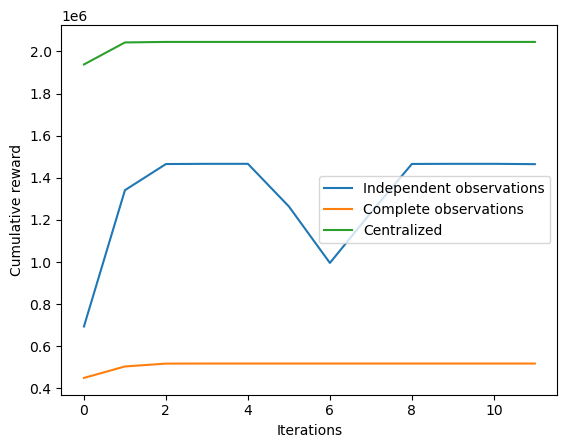

In [47]:
n_iterations = 12
cum_reward_full_obs = np.zeros(n_iterations)
cum_reward = np.zeros(n_iterations)
cum_reward_c = np.zeros(n_iterations)
for i in range(n_iterations):
    for j in range(n_epochs):
        idx = n_epochs*i + j
        cum_reward_full_obs[i] += a_rew1[idx]
        cum_reward[i] += a_rew[idx]
        cum_reward_c[i] += c_rew[idx]
    
plt.plot(np.arange(n_iterations), cum_reward, label='Independent observations')
plt.plot(np.arange(n_iterations), cum_reward_full_obs, label='Complete observations')
plt.plot(np.arange(n_iterations), cum_reward_c, label='Centralized')
plt.xlabel('Iterations')
plt.ylabel('Cumulative reward')
plt.legend()
plt.show()

In [77]:
np.array_equal(a_steps[:904], ep_survived)

False

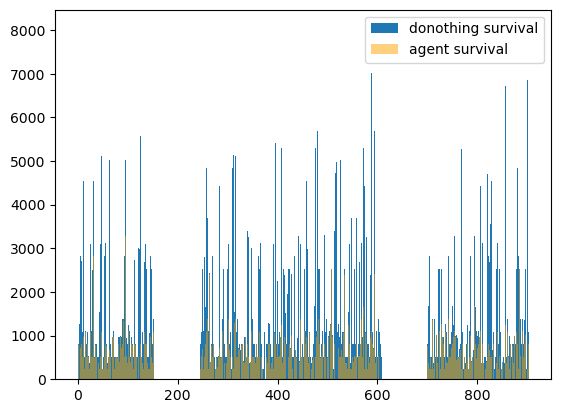

In [98]:
plt.bar(np.arange(n_epochs), dn_surv, label='donothing survival')
plt.bar(np.arange(n_epochs), a_steps1[-n_epochs:], color='orange', label='agent survival', alpha=0.5)
#plt.scatter(np.arange(n_epochs), a_safe[-n_epochs:], label='safe steps')
plt.legend()
plt.show()

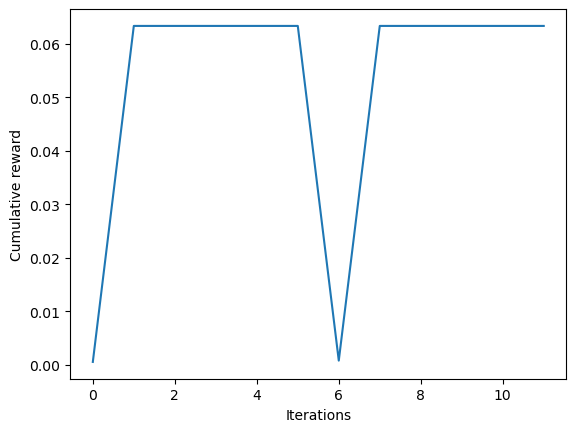

In [44]:
ts = 124
n_iterations = 12
surv_perc = np.zeros(n_iterations) 
for i in range(n_iterations):
    
    idx = n_epochs*i + ts
    surv_perc[i] = a_steps[idx] / 8064
    
plt.plot(np.arange(n_iterations), surv_perc)
plt.xlabel('Iterations')
plt.ylabel('Cumulative reward')
plt.show()

In [5]:
#n_survived/n_safe
surv_ratio = []
for i in range(n_iterations):
    ratio = 0
    for j in range(n_epochs):
        idx = n_epochs*i + j
        if a_safe[idx] == 0:
            ratio += a_steps[idx]
        else:
            ratio += a_steps[idx]/a_safe[idx]
    ratio = ratio/n_epochs
    surv_ratio.append(ratio)

plt.plot(np.arange(n_iterations), surv_ratio)
plt.xlabel('Iteration')
plt.ylabel('Survived-safe ratio')
plt.show

NameError: name 'n_iterations' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

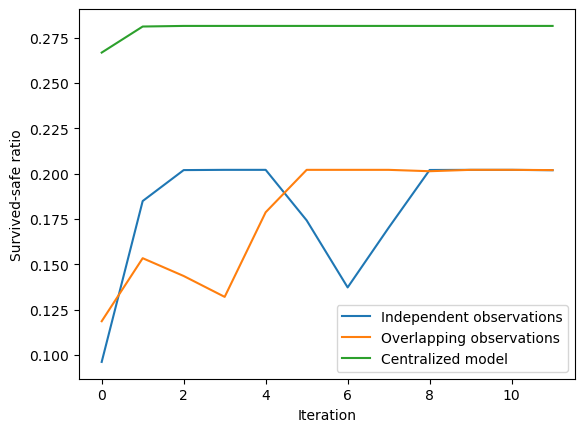

In [19]:
max_iter = env_train.chronics_handler.max_episode_duration()
ratios = []
ratios_f = []
ratios_c = []
n_iterations = 12
for i in range(n_iterations):
    avg = 0
    avg_f = 0
    avg_c = 0
    for j in range(n_epochs):
        idx = n_epochs*i + j
        r = a_steps[idx] / max_iter
        r_f = a_steps1[idx] / max_iter
        r_c = c_steps[idx] / max_iter
        avg += r
        avg_f += r_f
        avg_c += r_c
    
    avg = avg/n_epochs
    avg_f = avg_f/n_epochs
    avg_c = avg_c/n_epochs
    ratios.append(avg)
    ratios_c.append(avg_c)
    ratios_f.append(avg_f)


plt.plot(np.arange(n_iterations), ratios, label='Independent observations')
plt.plot(np.arange(n_iterations), ratios_f, label='Overlapping observations')
plt.plot(np.arange(n_iterations), ratios_c, label='Centralized model')
plt.xlabel('Iteration')
plt.ylabel('Survived-safe ratio')
plt.legend()
plt.show        

In [6]:
from train import Trainer
sub_clusters = [
            [0, 1, 2, 4],
            [3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
            ]
    
line_clusters = [
        [0,1,2,3,4,5,6],
        [7,8,9,10,11,12,13,14,15,16,17,18,19]
    ]

agent = IMARL(env_train, sub_clusters, line_clusters, SEED)
agent.load_model('Interesting_agents\\distributed_PPO_10848episodes_independent\\final')
agent.set_training_status(False)

for i in range(n_epochs):
    done = False
    obs = env_train.reset()
    print('----------------------')
    print(f'epoch {i}')
    while not done:
        
        action = agent.act(obs)
        if not safe(obs):
            print(f'obs: {obs.topo_vect}')
            print(f'act: {action.set_bus}')

        obs, reward, done, info = env_train.step(action)
        if not safe(obs):
            print(f'new obs: {obs.topo_vect}')


----------------------
epoch 0
obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
act: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
new obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
act: [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
new obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
act: [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 

c:\Users\david\OneDrive\Documenti\uni\Thesis\Code\distributed_grid2op\Agents\ClusterAgents.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\b\abs_8f7uhuge1i\croot\pytorch-select_1717607507421\work\torch\csrc\utils\tensor_new.cpp:277.)
  obs_tensor = torch.as_tensor(obs, device=self.ppo_agent.device)


----------------------
epoch 1
new obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
act: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
new obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
act: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
new obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
obs: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 

KeyboardInterrupt: 

----------------------
epoch 0
idx: tensor([[10]])
[0 0 0 1 1 2 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\david\OneDrive\Documenti\uni\Thesis\Code\distributed_grid2op\Agents\ClusterAgents.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\b\abs_8f7uhuge1i\croot\pytorch-select_1717607507421\work\torch\csrc\utils\tensor_new.cpp:277.)
  obs_tensor = torch.as_tensor(obs, device=self.ppo_agent.device)
C:\Users\david\AppData\Local\Temp\ipykernel_3096\1859331684.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


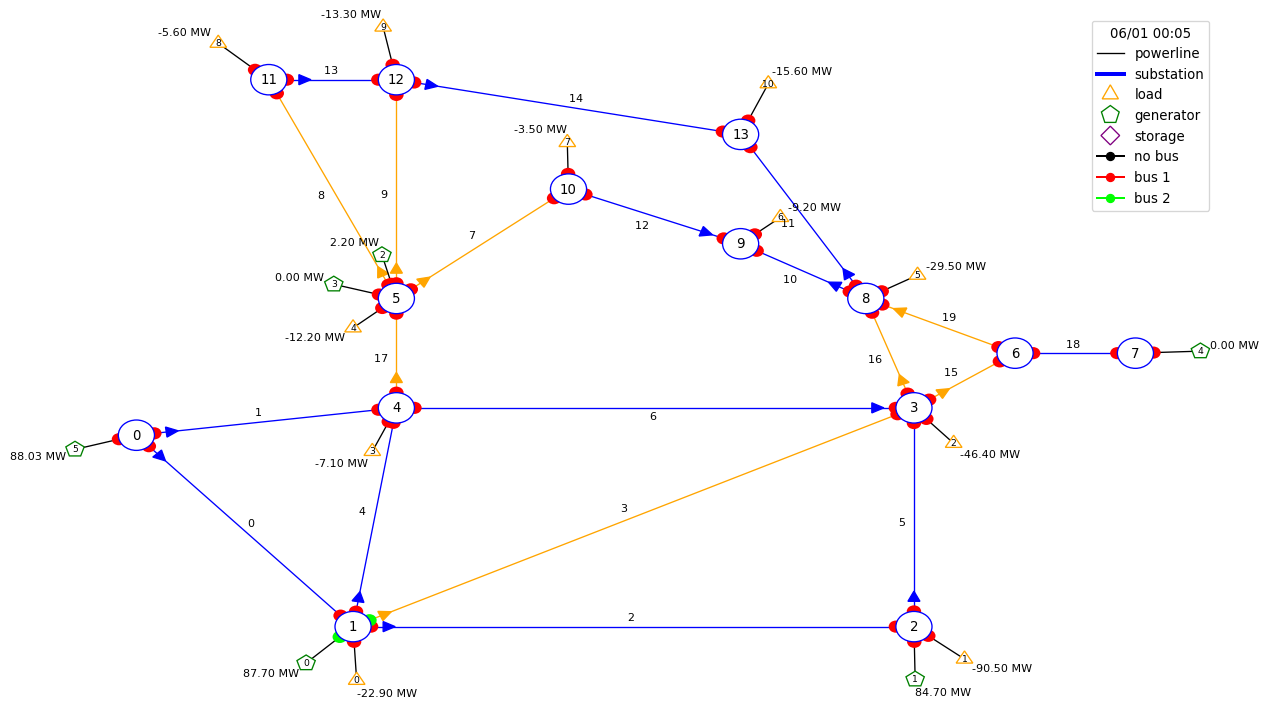

In [6]:
from train import Trainer
from grid2op.PlotGrid import PlotMatplot
from PIL import Image


sub_clusters = [
            [0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
            ]
    
line_clusters = [
        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    ]

agent = IMARL(env_train, sub_clusters, line_clusters, SEED)
agent.load_model('Interesting_agents\\centr_PPO_31640episodes\\final')
agent.set_training_status(False)


done = False
obs = env_train.reset()
print('----------------------')
print(f'epoch {0}')
while not done:
    action = agent.act(obs)
    if not safe(obs):
        print(action.set_bus)
    
    obs, reward, done, info = env_train.step(action)
    done = True
    
plot_helper = PlotMatplot(env_train.observation_space)
fig = plot_helper.plot_obs(obs, line_info="id")
fig.show()

In [22]:
agent = IMARL(env_train, sub_clusters, line_clusters, SEED)
agent.load_model('Interesting_agents\\centr_PPO_31640episodes\\final')
agent.set_training_status(False)

In [23]:
agent.agents[0].action_space_converter.num_actions

178

In [21]:
all_actions = []
for i in range(env_train.observation_space.n_sub):
    if env_train.observation_space.sub_info[i] > 3:
        print(f'sub{i}')
        all_actions += env_train.action_space.get_all_unitary_topologies_set(env_train.action_space, i)
        print(f'-> {len(env_train.action_space.get_all_unitary_topologies_set(env_train.action_space, i))}')

len(all_actions)

sub1
-> 29
sub2
-> 5
sub3
-> 31
sub4
-> 15
sub5
-> 57
sub8
-> 15
sub12
-> 7


159

C:\Users\david\AppData\Local\Temp\ipykernel_3096\3505080734.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


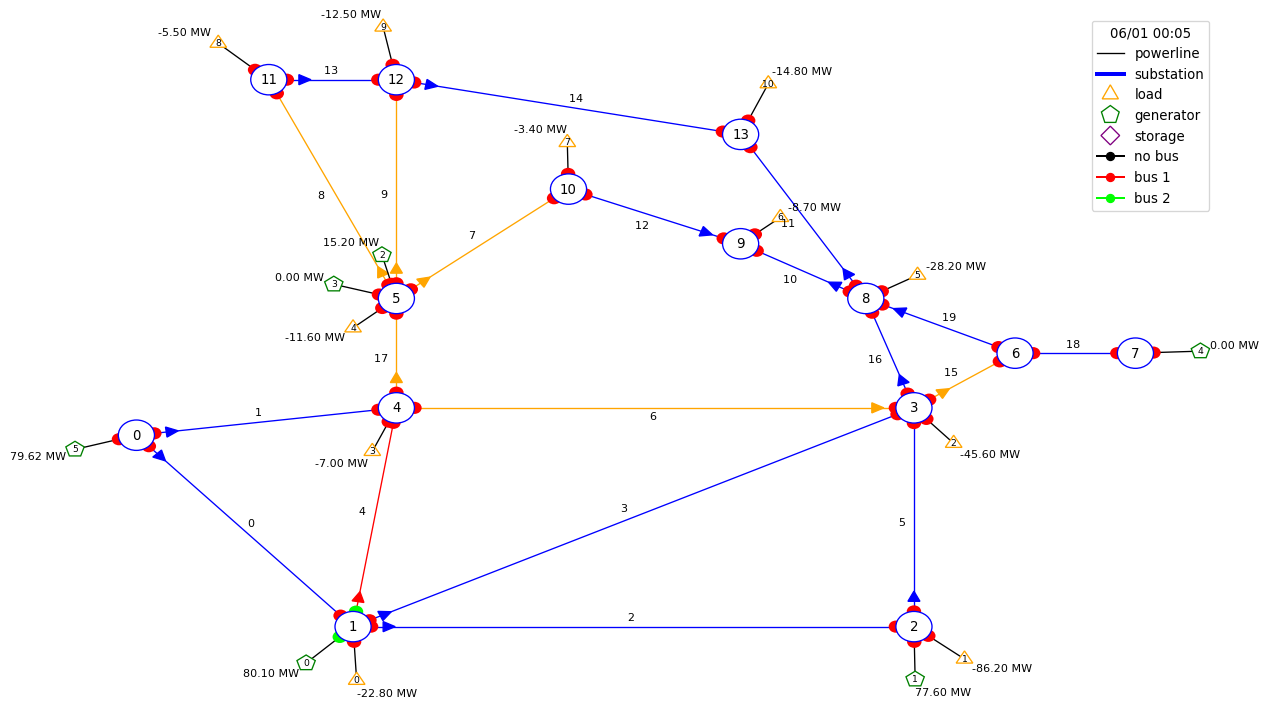

In [18]:
i = 3
obs = env_train.reset()
action = all_actions[i]
obs, _, _, _ = env_train.step(action)

plot_helper = PlotMatplot(env_train.observation_space)
fig = plot_helper.plot_obs(obs, line_info="id")
fig.show()